In [2]:
# koda vrne seznam vseh grafov na treh vozliščih

seznam3=[];
for G in graphs.nauty_geng('3 -c'):
    seznam3.append(G)

In [22]:
# koda vrne seznam vseh grafov na štirih vozliščih

seznam4=[];
for G in graphs.nauty_geng('4 -c'):
    seznam4.append(G)

In [23]:
# koda vrne seznam vseh grafov na petih vozliščih

seznam5=[];
for G in graphs.nauty_geng('5 -c'):
    seznam5.append(G)

In [24]:
# koda vrne seznam vseh grafov na šestih vozliščih

seznam6=[];
for G in graphs.nauty_geng('6 -c'):
    seznam6.append(G)

In [25]:
# koda vrne seznam vseh grafov na sedmih vozliščih

seznam7=[];
for G in graphs.nauty_geng('7 -c'):
    seznam7.append(G)

In [26]:
# koda vrne seznam vseh grafov na osmih vozliščih

seznam8=[];
for G in graphs.nauty_geng('8 -c'):
    seznam8.append(G)

In [1]:
# koda izračuna dominacijsko število grafa G

def dominacijsko(G):
    t = G.dominating_set(value_only= True)
    return t

In [2]:
# koda uredi stopnje vozlišč grafa G v nepadajoč seznam

def nepadajoc_seznam(G):
    D = G.degree_sequence()
    D.reverse()
    return D

In [3]:
# koda vrne število povezav grafa G

def stevilo_povezav(G):
    stevilo = G.edges()
    return len(stevilo)

In [4]:
# koda izračuna anihilacijsko število grafa G

def anihilacijsko_stevilo(G):
    D = nepadajoc_seznam(G)
    m = stevilo_povezav(G)
    a = 0   # anihilacijsko število
    v = 0   # vsota (stopenj vozlišč)
    i = 0   # števec
    while v <= m:
        if v + D[i] <= m:
            a = a + 1
            v = v + D[i]
            i = i + 1
        else:
            v = v + D[i]
    # dokler je delna vsota stopenj vozlišč iz nepadajočega seznama manjša od števila povezav,                                               zanka prišteje vsoti naslednjo stopnjo vozlišča
    return a

In [6]:
# koda preveri, ali neenakost, ki jo dokazujeva v nalogi, drži za graf G

def neenakost(G):
    gama = dominacijsko(G)
    a = anihilacijsko_stevilo(G)
    return a + 1 - gama >= 0

In [7]:
# koda preveri, ali zgoraj definirana neenakost drži za vse grafe iz danega seznama

def preveri_male_grafe(seznam_grafov):
    for i in seznam_grafov:
        if neenakost(i) == False:
            return False
    return True


In [8]:
# koda spremeni dan graf G

from sage.graphs.connectivity import is_connected
def spremeni_graf(G):
    H = Graph(G)
    if random() < 0.5:                       # z verjetnostjo 0,5
        i = 0
        while True:
            H.delete_edge(H.random_edge())   # grafu odstrani povezavo
            if is_connected(H):              # preveri, če je graf ostal povezan
                H                            # če je, ga shrani kot nov graf
                break
            else:
                H = Graph(G)                 # sicer poskusi ponovno odstraniti neko drugo povezavo
                i = i + 1
                True
            if i > 25:                       # če v 25 poskusih ne najde povezave, da bi graf ostal povezan po odstranitvi
                H.add_edge(H.complement().random_edge())   # naključno povezavo doda
                break
    else:                                    # z verjetnostjo 0,5
        if H.complement().size() == 0:       # če je graf poln
            H.delete_edge(H.random_edge())   # odstrani naključno povezavo
        else:
            H.add_edge(H.complement().random_edge())       # sicer doda naključno povezavo, ki je še ni v grafu
    return H                                 # vrne spremenjen graf


In [9]:
# koda izračuna razliko, za katero sva testirali kje doseže minimum in maksimum

def razlika(G):
    gama = dominacijsko(G)
    a = anihilacijsko_stevilo(G)
    return a + 1 - gama 

In [11]:
# vrne najmanjšo razliko, ki jo računa funkcija "razlika", za grafe iz danega seznama grafov

def min_razlika(seznam):
    min_razlika = 100
    for graf in seznam:
        nova_razlika = razlika(graf)
        if nova_razlika < min_razlika:
            min_razlika = nova_razlika
    return min_razlika

In [12]:
# koda išče najmanjšo razliko

def najmanjse_razlike(G):
    stevilo_korakov = 2000                         # število korakov
    trenutna_razlika = min_razlike = razlika(G)    # razlika za trenuten graf in minimalna razlika
    seznam_grafov_min = [G]                        # seznam grafov, kjer je dosežena trenutna minimalna razlika
    for p in range(0, stevilo_korakov):
        T = stevilo_korakov / (p+1)
        nov_graf = spremeni_graf(G)                # spremeni graf s funkcijo "spremeni_graf"
        nova_razlika = razlika(nov_graf)           # izračuna razliko za spremenjen graf
        if nova_razlika < min_razlike:
            min_razlike = nova_razlika             # če je nova razlika manjša od trenutne minimalne,                                                                                      jo shrani kot novo minimalno razliko
            seznam_grafov_min = []                 # sprazni seznam grafov, kjer je bila dosežena prejšnja minimalna razlika
            seznam_grafov_min.append(nov_graf)     # v seznam shrani spremenjen graf
        elif nova_razlika == min_razlike:          # če je razlika enaka trenutni minimalni
            if all(not H.is_isomorphic(nov_graf) for H in seznam_grafov_min):   # in spremenjen graf ni izomorfen nobenemu grafu,                                                                                       ki je že v seznamu
                seznam_grafov_min.append(nov_graf) # doda graf v seznam, kjer je dosežena minimalna razlika
        if nova_razlika < trenutna_razlika or exp(-1 * (nova_razlika - trenutna_razlika) / T) >= random():   # če je razlika na spremenjenem grafu manjša od trenutne minimalne razlike za nov graf nastavi spremenjen graf. Tudi če nova razlika ni manjša od trenutne, z neko verjetnostjo nastavi spremenjeni graf za nov graf
            
            G = nov_graf                           # nadaljuje iskanje na novem grafu
            trenutna_razlika = nova_razlika        # spremeni trenutno razliko na razliko spremenjenega grafa

    return (min_razlike, seznam_grafov_min)        # vrne minimalno razliko in seznam grafov, kjer je dosežena

In [13]:
def najvecje_razlike(G):
    stevilo_korakov = 2000                         # število korakov
    trenutna_razlika = max_razlike = razlika(G)    # razlika za trenuten graf in maksimalna razlika
    seznam_grafov_max = [G]                        # seznam grafov, kjer je dosežena trenutna maksimalna razlika
    for p in range(0, stevilo_korakov):
        T = stevilo_korakov / (p+1)
        nov_graf = spremeni_graf(G)                # spremeni graf s funkcijo "spremeni_graf"
        nova_razlika = razlika(nov_graf)           # izračuna razliko za spremenjen graf
        if nova_razlika > max_razlike:
            max_razlike = nova_razlika             # če je nova razlika večja od trenutne maksimalne,                                                                                      jo shrani kot novo maksimalno razliko
            seznam_grafov_max = []                 # sprazni seznam grafov, kjer je bila dosežena prejšnja maksimalna razlika
            seznam_grafov_max.append(nov_graf)     # v seznam shrani spremenjen graf
        elif nova_razlika == max_razlike:          # če je nova razlika enaka trenutni maksimalni
             if all(not H.is_isomorphic(nov_graf) for H in seznam_grafov_max):   # in spremenjen graf ni izomorfen nobenemu grafu,                                                                                        ki je že v seznamu
                seznam_grafov_max.append(nov_graf) # doda graf v seznam, kjer je dosežena maksimalna razlika
        if nova_razlika > trenutna_razlika or exp(-1 * (trenutna_razlika - nova_razlika) / T) >= random():    # če je razlika na spremenjenem grafu večja od trenutne maksimalne razlike za nov graf nastavi spremenjen graf. Tudi če nova razlika ni večja od trenutne, z neko verjetnostjo nastavi spremenjeni graf za nov graf.
            
            trenutna_razlika = nova_razlika        # spremeni trenutno razliko na razliko za spremenjen graf
        G = nov_graf  

    return (max_razlike, seznam_grafov_max)        # vrne maskimalno razliko in seznam grafov, kjer je ta dosežena

In [14]:
# koda generira naključen povezan graf s podanim številom vozlišč in povezav

def nakljucni_graf(st_vozlisc, st_povezav): 
    graf = graphs.RandomGNM(st_vozlisc, st_povezav)
    while graf.is_connected() == False:
        graf = graphs.RandomGNM(st_vozlisc, st_povezav)
    nakljucni = graf
    nakljucni.show()
    return nakljucni

In [15]:
# koda preveri, koliko grafov iz danega seznama je ravninskih

def ravninski():
    true = 0 
    false = 0
    for el in [G.is_planar() for G in L]:
        if el == True:
            true = true + 1
        else: 
            false = false + 1
    return (true, false)    

In [40]:
# koda preveri, koliko grafov iz danega seznama je dreves

def drevo():
    true = 0 
    false = 0
    for el in [G.is_tree() for G in L]:
        if el == True:
            true = true + 1
        else: 
            false = false + 1
    return (true, false)    

In [41]:
# koda preveri, koliko grafov iz danega seznama je kaktusov

def kaktus():
    true = 0 
    false = 0
    for el in [G.is_cactus() for G in L]:
        if el == True:
            true = true + 1
        else: 
            false = false + 1
    return (true, false)    

In [0]:
# izračuna najmanjšo razliko za naključni graf (število vozlišč in povezav sva spremnjali)

raz, L = najmanjse_razlike(nakljucni_graf(100,600))
print(raz)

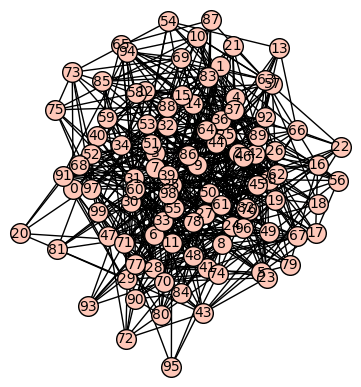

In [23]:
# izračuna največjo razliko za naključni graf (število vozlišč in povezav sva spremnjali)

raz, L = najvecje_razlike(nakljucni_graf(100,600))
print(raz)

In [0]:
# zanka išče minimalno razliko, ki je manjša ali enaka dani (v tem primeru 6)

raz = 100
while raz > 6:
    raz, L = najmanjse_razlike(nakljucni_graf(25,25))
print(raz)

In [0]:
# zanka išče maksimalno razliko, ki je večja ali enaka dani (v tem primeru 15)

raz = 0
while raz < 15:
    raz, L = najvecje_razlike(nakljucni_graf(10,10))
print(raz)

In [28]:
# število elementov seznama, kjer je dosežena najmanjša/največja razlika

len(L)

469

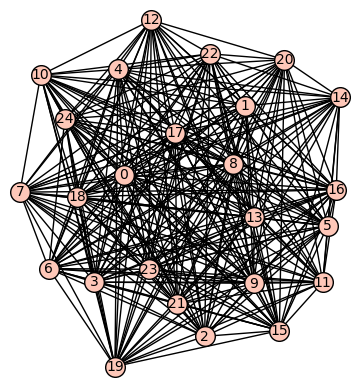

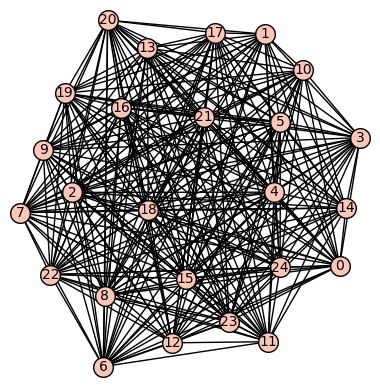

In [29]:
# prikaz grafov v seznamu, kjer je dosežena najmanjša/največja razlika

for G in L:
    G.show()

In [41]:
# seznam števil povezav v grafih iz seznama, kjer je dosežena najmanjša/največja razlika

[G.size() for G in L]

[424, 436, 440]

In [30]:
# najmanjše število povezav v grafih iz seznama, kjer je dosežena najmanjša/največja razlika (če je dolžina seznama prevelika)

min([G.size() for G in L])

204

In [31]:
# največje število povezav v grafih iz seznama, kjer je dosežena najmanjša/največja razlika (če je dolžina seznama prevelika)

max([G.size() for G in L])

288

In [141]:
ravninski()

(3, 0)

In [142]:
drevo()

(0, 3)

In [1]:
kaktus()

NameError: name 'kaktus' is not defined

In [0]:
# Še en algoritem za iskanje boljše rešitve. 

i = 0
while i <= 10: # Določimo, na koliko začetnih grafih naj testira 
    i = i + 1
    raz, L = najvecje_razlike(nakljucni_graf(100,600)) # Izračuna razliko
    if raz > 52: # Če je razlika večja / manjša (odvisno kaj preverjamo) vrne rezultat, drugače preverja dalje.
        print(raz)
        break